<a href="https://colab.research.google.com/github/rishabhs-s/Face-Recog-update/blob/master/FER2013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [14]:


import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

num_classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral
batch_size = 256
epochs = 60


df=pd.read_csv("/content/drive/My Drive/fer2013/fer2013.csv")



#initialize trainset and test set
X_train, y_train, X_test, y_test = [], [], [], []


#transfer train and test set data
for index, row in df.iterrows():
    val=row['pixels'].split(" ")
    try:
        if 'Training' in row['Usage']:
           X_train.append(np.array(val,'float32'))
           y_train.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
           X_test.append(np.array(val,'float32'))
           y_test.append(row['emotion'])
    except:
        print(f"error occured at index :{index} and row:{row}")

#data transformation for train and test sets
X_train = np.array(X_train, 'float32')
y_train = np.array(y_train, 'float32')
X_test = np.array(X_test, 'float32')
y_test = np.array(y_test, 'float32')



#normalizing data between oand 1
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train, axis=0)

X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test, axis=0)

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_train = X_train.astype('float32')
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)
X_test = X_test.astype('float32')

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
#------------------------------
#construct CNN structure
model = Sequential()

#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))#kernel size is the filter size that we are going to superimpose n images,relu is recifier activation function 
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))#kernel size is the filter size that we are going to superimpose n images,relu is recifier activation function 
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))#kernel size is the filter size that we are going to superimpose n images,relu is recifier activation function 
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))#drop out somethings so that model doesnt overfit
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))#drop out somethings so that model doesnt overfit

model.add(Dense(num_classes, activation='softmax'))# softmax as we have to choose bw the available labels given


#Compliling the model
model.compile(loss='sparse_categorical_crossentropy'
    , optimizer=keras.optimizers.Adam()
    , metrics=['accuracy'])



#Training the model
model.fit(X_train, train_y,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, test_y),
          shuffle=True)


score = model.evaluate(X_test, test_y)
print('Test loss:', score[0])
print('Test accuracy:', 100*score[1])

#function for drawing bar chart for emotion preditions
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()






28709 train samples
3589 test samples
Train on 28709 samples, validate on 3589 samples
Epoch 1/60
28709/28709 [==============================] - 8s 281us/step - loss: 1.7712 - accuracy: 0.2651 - val_loss: 1.7189 - val_accuracy: 0.2920
Epoch 2/60
28709/28709 [==============================] - 7s 246us/step - loss: 1.5817 - accuracy: 0.3693 - val_loss: 1.5247 - val_accuracy: 0.4076
Epoch 3/60
28709/28709 [==============================] - 7s 246us/step - loss: 1.4597 - accuracy: 0.4272 - val_loss: 1.5000 - val_accuracy: 0.4146
Epoch 4/60
28709/28709 [==============================] - 7s 246us/step - loss: 1.3607 - accuracy: 0.4768 - val_loss: 1.3259 - val_accuracy: 0.4923
Epoch 5/60
28709/28709 [==============================] - 7s 247us/step - loss: 1.2705 - accuracy: 0.5150 - val_loss: 1.2563 - val_accuracy: 0.5196
Epoch 6/60
28709/28709 [==============================] - 7s 251us/step - loss: 1.2106 - accuracy: 0.5385 - val_loss: 1.2370 - val_accuracy: 0.5300
Epoch 7/60
28709/28709 [=

In [15]:
model.save('ferlatest.h5')


In [16]:
fer_json = model.to_json()
with open("ferlatest.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("ferlatest.h5")

In [21]:
import matplotlib.pyplot as plt


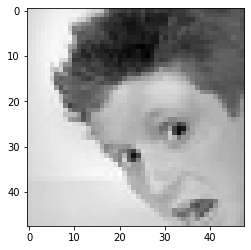

[1.5152487e-04 1.6887672e-08 4.7048230e-02 4.8710535e-05 8.2337167e-05
 3.5867885e-01 5.9399033e-01]


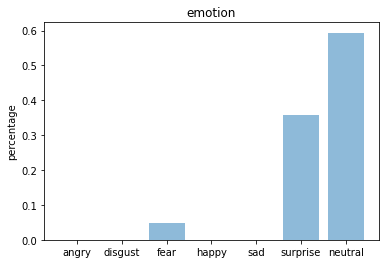

----------------------------------------------


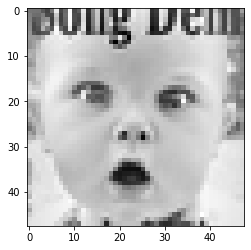

[5.1591614e-22 2.4905044e-26 5.2586667e-08 4.2592976e-15 1.3589369e-28
 1.0000000e+00 4.8704487e-17]


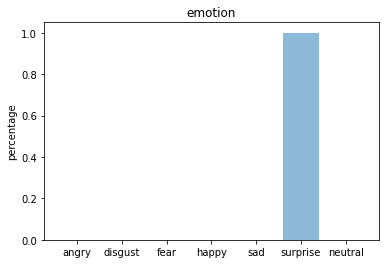

----------------------------------------------


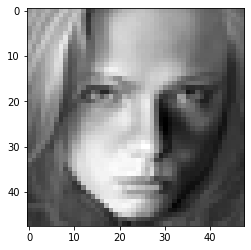

[7.3862611e-07 2.6836427e-13 4.2025022e-06 3.6199996e-10 9.9997997e-01
 1.0496074e-13 1.5133734e-05]


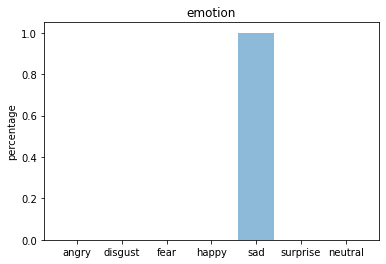

----------------------------------------------


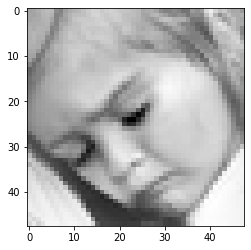

[2.0326422e-10 5.5716425e-19 4.8100801e-11 9.1194092e-09 8.7064775e-03
 7.2463708e-17 9.9129349e-01]


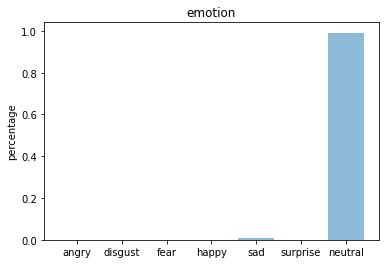

----------------------------------------------


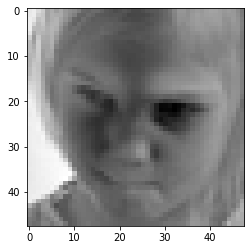

[2.5435755e-02 4.6844448e-08 2.1724600e-05 3.3227590e-07 9.7141063e-01
 4.5046555e-10 3.1314886e-03]


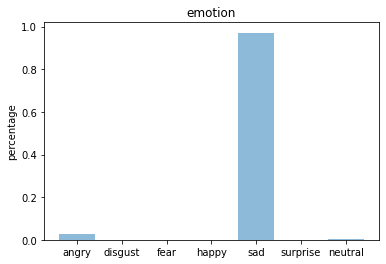

----------------------------------------------


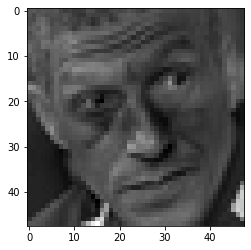

[7.6986438e-01 1.2436045e-06 2.0352893e-05 5.3677954e-06 2.2036453e-01
 3.1004308e-07 9.7437538e-03]


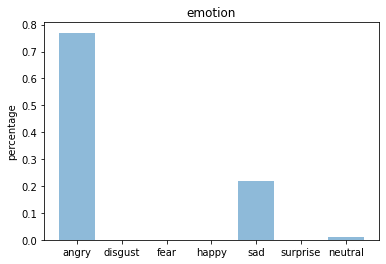

----------------------------------------------


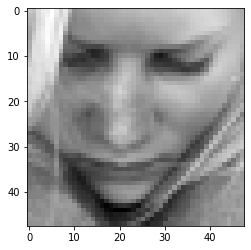

[1.8616500e-05 1.0832253e-07 2.2286288e-01 2.0359007e-06 7.7711302e-01
 2.5968639e-08 3.3177703e-06]


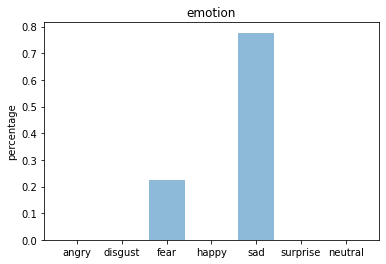

----------------------------------------------


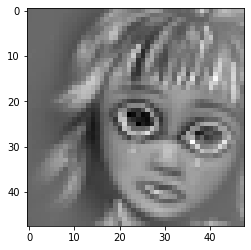

[3.3684006e-10 8.6651714e-14 9.9584287e-01 1.4211633e-07 3.9943499e-03
 7.9904277e-07 1.6185657e-04]


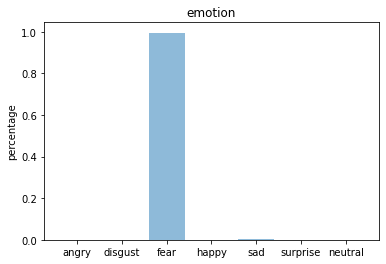

----------------------------------------------


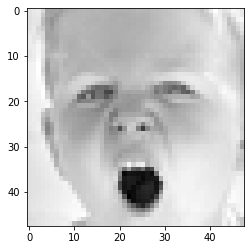

[6.4641512e-03 2.1067267e-07 3.8379739e-04 1.6416557e-02 2.7811395e-03
 9.7368842e-01 2.6577088e-04]


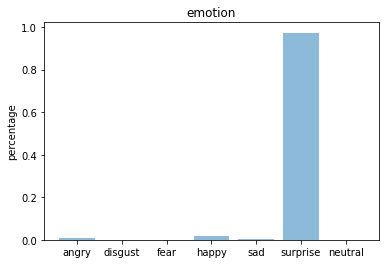

----------------------------------------------


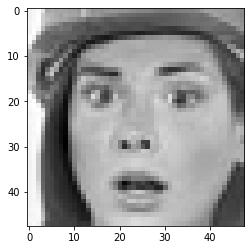

[6.8947443e-06 1.8882952e-06 4.9649432e-01 4.6816426e-09 1.3068345e-04
 5.0334889e-01 1.7295917e-05]


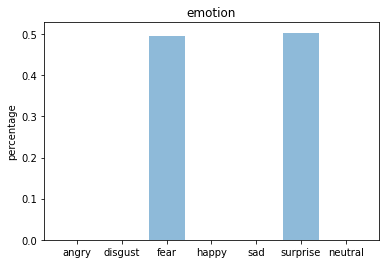

----------------------------------------------


In [25]:
monitor_testset_results = True

if monitor_testset_results == True:
	#make predictions for test set
	predictions = model.predict(X_test)

	index = 0
	for i in predictions:
		if index < 30 and index >= 20:
			#print(i) #predicted scores
			#print(y_test[index]) #actual scores
			
			testing_img = np.array(X_test[index], 'float32')
			testing_img = testing_img.reshape([48, 48]);
			
			plt.gray()
			plt.imshow(testing_img)
			plt.show()
			
			print(i)
			
			emotion_analysis(i)
			print("----------------------------------------------")
		index = index + 1